# EVALUACIÓN FINAL: ANÁLISIS DEL IMPACTO DEL CAMBIO CLIMÁTICO EN LA PRODUCCIÓN AGRÍCOLA
Eres un analista de datos en un centro de investigación sobre cambio climático y seguridad alimentaria. Te han encomendado evaluar cómo factores climáticos afectan la producción agrícola en distintos países. Para ello, aplicarás modelos de aprendizaje supervisado para predecir la producción de alimentos y clasificar los países según su vulnerabilidad.

**OBJETIVOS DE LA EVALUACIÓN**
* Aplicar técnicas de regresión para predecir la producción agrícola en función de variables climáticas.
* Utilizar algoritmos de clasificación para categorizar los países según el impacto del cambio climático.
* Evaluar el desempeño de los modelos mediante métricas adecuadas.
* Aplicar preprocesamiento de datos para mejorar la calidad del análisis.
* Optimizar los modelos a través de técnicas de ajuste de hiperparámetros.

# INSTRUCCIONES

**1. Carga y exploración de datos (1 punto)**
* Carga el dataset proporcionado, que contiene información sobre temperatura media, cambio en las precipitaciones, frecuencia de sequías y producción agrícola en distintos países.
* Analiza la distribución de las variables y detecta posibles valores atípicos o
tendencias.

**2. Preprocesamiento y escalamiento de datos (2 puntos)**
* Aplica técnicas de normalización o estandarización a las variables numéricas.
* Codifica correctamente cualquier variable categórica si fuera necesario.
* Divide los datos en conjunto de entrenamiento y prueba (80%-20%).

**3. Aplicación de modelos de aprendizaje supervisado (4 puntos)**
* Regresión:
  * Entrena un modelo de regresión lineal para predecir la producción de
alimentos.
  * Evalúa el modelo usando métricas como MAE, MSE y R2.
  * Compara con otros modelos de regresión (árbol de decisión, random forest).
* Clasificación:
  * Crea una nueva variable categórica que clasifique los países en "Bajo",
"Medio" y "Alto" impacto climático en la producción agrícola.
  * Entrena modelos de clasificación como K-Nearest Neighbors, Árbol de
Decisión y Support Vector Machine.
  * Evalúa el desempeño usando matriz de confusión, precisión, sensibilidad y
curva ROC-AUC.

**4. Optimización de modelos (2 puntos)**
* Ajusta hiperparámetros utilizando validación cruzada y búsqueda en grilla.
* Aplica técnicas de regularización y analiza su impacto en los modelos.

**5. Análisis de resultados y conclusiones (1 punto)**
* Compara los modelos utilizados y justifica cuál ofrece mejores resultados para la predicción y clasificación.
* Relaciona los hallazgos con posibles implicaciones en la seguridad alimentaria
global.
________________________________________________________________________________

**1. Carga y exploración de datos (1 punto)**
* Carga el dataset proporcionado, que contiene información sobre temperatura media, cambio en las precipitaciones, frecuencia de sequías y producción agrícola en distintos países.
* Analiza la distribución de las variables y detecta posibles valores atípicos o
tendencias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cambio_climatico_agricultura.csv')
display(pd.DataFrame(df))

,País,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos
0,Alemania,10.5,-5,2,950000
1,Argentina,17.8,-10,5,650000
2,Australia,22.3,-15,8,400000
3,Brasil,25.1,-8,6,900000
4,Canadá,6.2,-2,1,850000
5,Chile,15.4,-12,7,500000
6,España,18.2,-9,6,600000
7,Estados Unidos,12.8,-4,3,1200000
8,Francia,11.5,-6,2,980000
9,Italia,13.4,-7,4,700000


Número de nulos


,0
País,0
Temperatura_promedio,0
Cambio_lluvias,0
Frecuencia_sequías,0
Producción_alimentos,0



Tipo de variables


,0
País,object
Temperatura_promedio,float64
Cambio_lluvias,int64
Frecuencia_sequías,int64
Producción_alimentos,int64



Estadísticas descriptivas


,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos
count,23.000000,23.000000,23.000000,2.300000e+01
mean,16.291304,-7.782609,4.347826,7.030435e+05
std,6.692256,4.055933,2.604344,2.410665e+05
min,4.600000,-15.000000,1.000000,3.000000e+05
25%,12.150000,-11.000000,2.000000,5.250000e+05
50%,15.400000,-8.000000,4.000000,7.000000e+05
75%,21.400000,-4.500000,6.500000,8.950000e+05
max,28.000000,-1.000000,9.000000,1.200000e+06



Distribución de variables


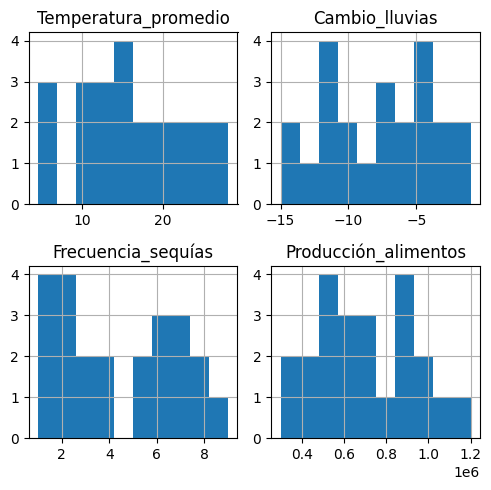


Outliers


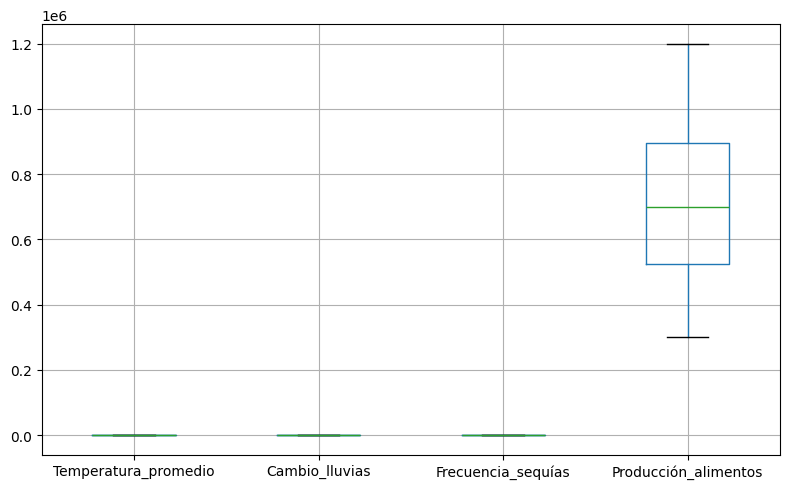

In [2]:
# Detectar nulos
df.isnull().sum()
print('Número de nulos')
display(df.isnull().sum())

# Mostrat tipo de variables
print('\nTipo de variables')
display(df.dtypes)

# Mostrar estadísticas descriptivas
print('\nEstadísticas descriptivas')
display(df.describe())


# Analizar distribución de variables
print('\nDistribución de variables')
df.hist(figsize=(5, 5))
plt.tight_layout()
plt.show()

# Detectar posibles outliers
print('\nOutliers')
df.boxplot(figsize=(8, 5))
plt.tight_layout()
plt.show()

**2. Preprocesamiento y escalamiento de datos (2 puntos)**
* Aplica técnicas de normalización o estandarización a las variables numéricas.
* Codifica correctamente cualquier variable categórica si fuera necesario.
* Divide los datos en conjunto de entrenamiento y prueba (80%-20%).

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Identificar columnas numéricas (excluyendo 'País')
numerical_cols = ['Temperatura_promedio', 'Cambio_lluvias', 'Frecuencia_sequías', 'Producción_alimentos']

# Aplicar StandardScaler a las columnas numéricas
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 'País' es una variable categórica, pero es un identificador y no necesita codificación para las tareas de regresión y clasificación inicial.

# Definir características (X) y objetivo (y)
X = df.drop(['País', 'Producción_alimentos'], axis=1) # Las características son variables climáticas
y = df['Producción_alimentos'] # El objetivo es la producción agrícola

# Dividir los datos en conjuntos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3. Aplicación de modelos de aprendizaje supervisado (4 puntos)**
* Regresión:
  * Entrena un modelo de regresión lineal para predecir la producción de
alimentos.
  * Evalúa el modelo usando métricas como MAE, MSE y R2.
  * Compara con otros modelos de regresión (árbol de decisión, random forest).
* Clasificación:
  * Crea una nueva variable categórica que clasifique los países en "Bajo",
"Medio" y "Alto" impacto climático en la producción agrícola.
  * Entrena modelos de clasificación como K-Nearest Neighbors, Árbol de
Decisión y Support Vector Machine.
  * Evalúa el desempeño usando matriz de confusión, precisión, sensibilidad y
curva ROC-AUC.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor


# Entrenar el modelo de Regresión Lineal
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lr = linear_reg_model.predict(X_test)

# Evaluar el modelo de Regresión Lineal
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Métricas de evaluación para Regresión Lineal:")
print(f"  MAE: {mae_lr:.4f}")
print(f"  MSE: {mse_lr:.4f}")
print(f"  R2: {r2_lr:.4f}")

# Entrenar el modelo de Árbol de Decisión para Regresión
dt_reg_model = DecisionTreeRegressor(random_state=42)
dt_reg_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_dt = dt_reg_model.predict(X_test)

# Evaluar el modelo de Árbol de Decisión
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nMétricas de evaluación para Árbol de Decisión (Regresión):")
print(f"  MAE: {mae_dt:.4f}")
print(f"  MSE: {mse_dt:.4f}")
print(f"  R2: {r2_dt:.4f}")

# Entrenar el modelo de Random Forest para Regresión
rf_reg_model = RandomForestRegressor(random_state=42)
rf_reg_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_reg_model.predict(X_test)

# Evaluar el modelo de Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nMétricas de evaluación para Random Forest (Regresión):")
print(f"  MAE: {mae_rf:.4f}")
print(f"  MSE: {mse_rf:.4f}")
print(f"  R2: {r2_rf:.4f}")

Métricas de evaluación para Regresión Lineal:
  MAE: 0.7552
  MSE: 0.7861
  R2: -0.2621

Métricas de evaluación para Árbol de Decisión (Regresión):
  MAE: 0.8483
  MSE: 1.2025
  R2: -0.9305

Métricas de evaluación para Random Forest (Regresión):
  MAE: 0.6743
  MSE: 0.6150
  R2: 0.0127


In [6]:
# Crear una nueva variable categórica que clasifique los países en "Bajo", "Medio" y "Alto" impacto climático
df['Impacto_Climatico'] = pd.qcut(df['Producción_alimentos'], q=3, labels=['Bajo', 'Medio', 'Alto'])

# Contar cada categoría para verificar la distribución
print("Distribución de la nueva variable 'Impacto_Climatico':")
display(df['Impacto_Climatico'].value_counts())

# Definir características para la clasificación
X_clf = df.drop(['País', 'Producción_alimentos', 'Impacto_Climatico'], axis=1)
y_clf = df['Impacto_Climatico']

# Dividir los datos en conjuntos de entrenamiento y prueba para clasificación (80%-20%)
# Usamos stratify=y_clf para asegurar que la distribución de clases sea similar en ambos conjuntos
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

Distribución de la nueva variable 'Impacto_Climatico':


,count
Impacto_Climatico,
Bajo,8
Alto,8
Medio,7


Evaluación del modelo K-Nearest Neighbors:
[[2 0 0]
 [1 0 1]
 [1 0 0]]
              precision    recall  f1-score   support

        Alto       0.50      1.00      0.67         2
        Bajo       0.00      0.00      0.00         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.17      0.33      0.22         5
weighted avg       0.20      0.40      0.27         5

--------------------------------------------------
Evaluación del modelo de Árbol de Decisión:
[[1 0 1]
 [1 1 0]
 [1 0 0]]
              precision    recall  f1-score   support

        Alto       0.33      0.50      0.40         2
        Bajo       1.00      0.50      0.67         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.44      0.33      0.36         5
weighted avg       0.53      0.40      0.43         5

--------------------------------------------

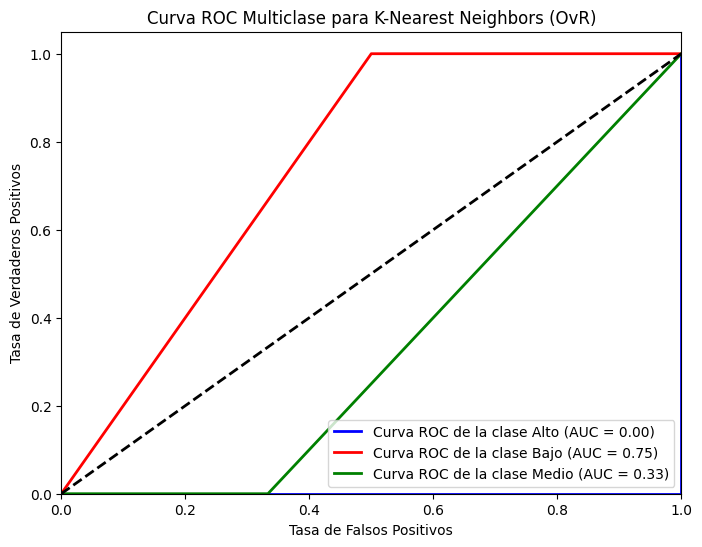

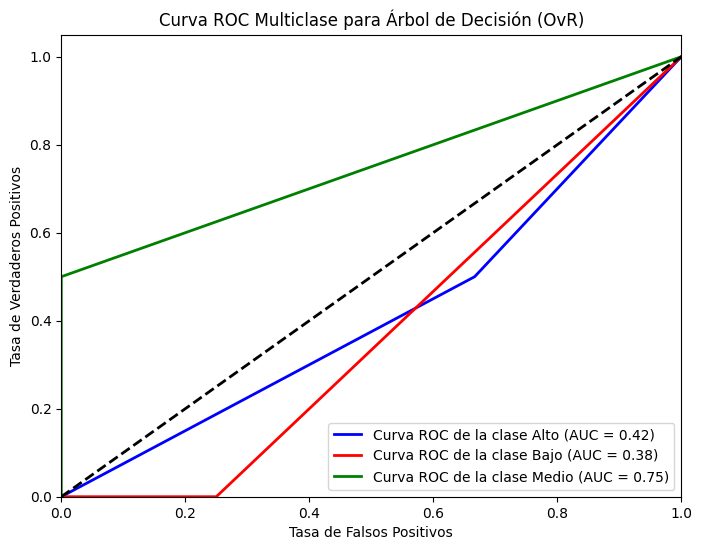

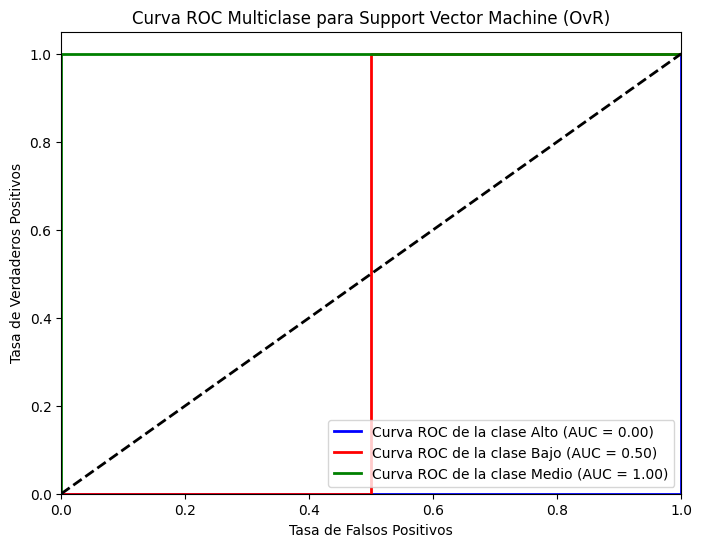

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Entrenar el modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3) # Puedes ajustar n_neighbors
knn_model.fit(X_train_clf, y_train_clf)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test_clf)

# Evaluar el modelo K-Nearest Neighbors
print("Evaluación del modelo K-Nearest Neighbors:")
print(confusion_matrix(y_test_clf, y_pred_knn))
print(classification_report(y_test_clf, y_pred_knn, zero_division=0)) # Added zero_division=0

print("-" * 50)

# Entrenar el modelo de Árbol de Decisión para Clasificación
dt_clf_model = DecisionTreeClassifier(random_state=42)
dt_clf_model.fit(X_train_clf, y_train_clf)

# Realizar predicciones
y_pred_dt_clf = dt_clf_model.predict(X_test_clf)

# Evaluar el modelo de Árbol de Decisión
print("Evaluación del modelo de Árbol de Decisión:")
print(confusion_matrix(y_test_clf, y_pred_dt_clf))
print(classification_report(y_test_clf, y_pred_dt_clf, zero_division=0)) # Added zero_division=0

print("-" * 50)

# Entrenar el modelo Support Vector Machine
# Es necesario ajustar el kernel y otros hiperparámetros para optimizar
svm_model = SVC(probability=True, random_state=42) # probability=True para la curva ROC
svm_model.fit(X_train_clf, y_train_clf)

# Realizar predicciones
y_pred_svm = svm_model.predict(X_test_clf)

# Evaluar el modelo Support Vector Machine
print("Evaluación del modelo Support Vector Machine:")
print(confusion_matrix(y_test_clf, y_pred_svm))
print(classification_report(y_test_clf, y_pred_svm, zero_division=0)) # Added zero_division=0

# Para la curva ROC, necesitamos las probabilidades de predicción.
# SVC con probability=True puede ser lento, considera otros modelos si el dataset es grande.
# Además, la curva ROC-AUC es típicamente para clasificación binaria.
# Para multiclase, se puede hacer una curva ROC por clase (one-vs-rest o one-vs-one).

# Vamos a calcular la curva ROC-AUC para cada clase usando el enfoque one-vs-rest
y_prob_knn = knn_model.predict_proba(X_test_clf)
y_prob_dt_clf = dt_clf_model.predict_proba(X_test_clf)
y_prob_svm = svm_model.predict_proba(X_test_clf)

# Binarizar las etiquetas de prueba para el cálculo de ROC
y_test_clf_bin = label_binarize(y_test_clf, classes=['Bajo', 'Medio', 'Alto'])
n_classes = y_test_clf_bin.shape[1]

# Function to plot ROC curve for a given model
def plot_multiclass_roc(model, y_test_bin, y_prob, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        if y_test_bin[:, i].sum() == 0 or y_prob[:, i].sum() == 0:
            fpr[i] = [0, 1]
            tpr[i] = [0, 1]
            roc_auc[i] = 0.5 # AUC for random chance
        else:
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Curva ROC de la clase {0} (AUC = {1:.2f})'
                 ''.format(model.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC Multiclase para {model_name} (OvR)')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for each model
plot_multiclass_roc(knn_model, y_test_clf_bin, y_prob_knn, "K-Nearest Neighbors")
plot_multiclass_roc(dt_clf_model, y_test_clf_bin, y_prob_dt_clf, "Árbol de Decisión")
plot_multiclass_roc(svm_model, y_test_clf_bin, y_prob_svm, "Support Vector Machine")

**4. Optimización de modelos (2 puntos)**
* Ajusta hiperparámetros utilizando validación cruzada y búsqueda en grilla.
* Aplica técnicas de regularización y analiza su impacto en los modelos.

In [8]:
from sklearn.model_selection import GridSearchCV

# Definir la grilla de parámetros para Random Forest Regressor
# Reducimos la grilla para una búsqueda más rápida (2x2x2x2 = 16 combinaciones)
param_grid_rf = {
    'n_estimators': [50, 100], # Número de árboles en el bosque
    'max_depth': [10, 20], # Profundidad máxima del árbol
    'min_samples_split': [2, 5], # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2] # Número mínimo de muestras requeridas en un nodo hoja
}

# Crear un objeto GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5, # Validación cruzada de 5 pliegues
                              scoring='neg_mean_squared_error', # Usar MSE negativo como métrica de puntuación
                              n_jobs=-1) # Usar todos los núcleos disponibles

# Ajustar la búsqueda en grilla a los datos de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor puntaje
print("Mejores parámetros para Random Forest Regressor:")
print(grid_search_rf.best_params_)
print("\nMejor MSE (negativo) en validación cruzada:")
print(grid_search_rf.best_score_)

# Obtener el mejor modelo
best_rf_reg_model = grid_search_rf.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_best_rf = best_rf_reg_model.predict(X_test)

mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("\nMétricas de evaluación del mejor modelo Random Forest Regressor en el conjunto de prueba:")
print(f"  MAE: {mae_best_rf:.4f}")
print(f"  MSE: {mse_best_rf:.4f}")
print(f"  R2: {r2_best_rf:.4f}")

Mejores parámetros para Random Forest Regressor:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Mejor MSE (negativo) en validación cruzada:
-0.31733005780877377

Métricas de evaluación del mejor modelo Random Forest Regressor en el conjunto de prueba:
  MAE: 0.6578
  MSE: 0.5950
  R2: 0.0448


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Definir la grilla de parámetros para SVC
param_grid_svc = {
    'C': [0.1, 1, 10], # Parámetro de regularización
    'kernel': ['linear', 'rbf'], # Tipo de kernel
    'gamma': ['scale', 'auto'] # Coeficiente del kernel para 'rbf'
}

# Crear un objeto GridSearchCV
grid_search_svc = GridSearchCV(estimator=SVC(probability=True, random_state=42), # probability=True para calcular ROC-AUC
                               param_grid=param_grid_svc,
                               cv=5, # Validación cruzada de 5 pliegues
                               scoring='accuracy', # Usar accuracy como métrica de puntuación inicial
                               n_jobs=-1) # Usar todos los núcleos disponibles

# Ajustar la búsqueda en grilla a los datos de entrenamiento de clasificación
grid_search_svc.fit(X_train_clf, y_train_clf)

# Imprimir los mejores parámetros y el mejor puntaje
print("Mejores parámetros para Support Vector Machine (SVC):")
print(grid_search_svc.best_params_)
print("\nMejor accuracy en validación cruzada:")
print(grid_search_svc.best_score_)

# Obtener el mejor modelo
best_svc_model = grid_search_svc.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba de clasificación
y_pred_best_svc = best_svc_model.predict(X_test_clf)

print("\nEvaluación del mejor modelo Support Vector Machine (SVC) en el conjunto de prueba:")
print(confusion_matrix(y_test_clf, y_pred_best_svc))
print(classification_report(y_test_clf, y_pred_best_svc, zero_division=0))

# Para evaluar ROC-AUC del mejor modelo SVC
y_prob_best_svc = best_svc_model.predict_proba(X_test_clf)

# Binarizar las etiquetas de prueba para el cálculo de ROC
y_test_clf_bin = label_binarize(y_test_clf, classes=best_svc_model.classes_)
n_classes = y_test_clf_bin.shape[1]

# Calcular ROC y AUC para cada clase del mejor modelo SVC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    if y_test_clf_bin[:, i].sum() == 0 or y_prob_best_svc[:, i].sum() == 0:
        fpr[i] = [0, 1]
        tpr[i] = [0, 1]
        roc_auc[i] = 0.5 # AUC for random chance
    else:
        fpr[i], tpr[i], _ = roc_curve(y_test_clf_bin[:, i], y_prob_best_svc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

Mejores parámetros para Support Vector Machine (SVC):
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Mejor accuracy en validación cruzada:
0.55

Evaluación del mejor modelo Support Vector Machine (SVC) en el conjunto de prueba:
[[2 0 0]
 [0 1 1]
 [0 0 1]]
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00         2
        Bajo       1.00      0.50      0.67         2
       Medio       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.78         5
weighted avg       0.90      0.80      0.80         5



In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Definir la grilla de parámetros para K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9], # Número de vecinos a considerar
    'weights': ['uniform', 'distance'], # Función de peso utilizada en la predicción
    'metric': ['euclidean', 'manhattan'] # Métrica de distancia para el árbol KDTree o BallTree
}

# Crear un objeto GridSearchCV para KNN
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                               param_grid=param_grid_knn,
                               cv=5, # Validación cruzada de 5 pliegues
                               scoring='accuracy', # Usar accuracy como métrica de puntuación
                               n_jobs=-1) # Usar todos los núcleos disponibles

# Ajustar la búsqueda en grilla a los datos de entrenamiento de clasificación
grid_search_knn.fit(X_train_clf, y_train_clf)

# Imprimir los mejores parámetros y el mejor puntaje para KNN
print("Mejores parámetros para K-Nearest Neighbors:")
print(grid_search_knn.best_params_)
print("\nMejor accuracy en validación cruzada para KNN:")
print(grid_search_knn.best_score_)

# Obtener el mejor modelo KNN
best_knn_model = grid_search_knn.best_estimator_

# Evaluar el mejor modelo KNN en el conjunto de prueba
y_pred_best_knn = best_knn_model.predict(X_test_clf)

print("\nEvaluación del mejor modelo K-Nearest Neighbors en el conjunto de prueba:")
print(confusion_matrix(y_test_clf, y_pred_best_knn))
print(classification_report(y_test_clf, y_pred_best_knn, zero_division=0))

print("-" * 50)

# Definir la grilla de parámetros para Árbol de Decisión para Clasificación
param_grid_dt_clf = {
    'max_depth': [None, 5, 10, 15], # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10], # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4], # Número mínimo de muestras requeridas en un nodo hoja
    'criterion': ['gini', 'entropy'] # Función para medir la calidad de una división
}

# Crear un objeto GridSearchCV para Árbol de Decisión
grid_search_dt_clf = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                  param_grid=param_grid_dt_clf,
                                  cv=5, # Validación cruzada de 5 pliegues
                                  scoring='accuracy', # Usar accuracy como métrica de puntuación
                                  n_jobs=-1) # Usar todos los núcleos disponibles

# Ajustar la búsqueda en grilla a los datos de entrenamiento de clasificación
grid_search_dt_clf.fit(X_train_clf, y_train_clf)

# Imprimir los mejores parámetros y el mejor puntaje para Árbol de Decisión
print("Mejores parámetros para Árbol de Decisión:")
print(grid_search_dt_clf.best_params_)
print("\nMejor accuracy en validación cruzada para Árbol de Decisión:")
print(grid_search_dt_clf.best_score_)

# Obtener el mejor modelo de Árbol de Decisión
best_dt_clf_model = grid_search_dt_clf.best_estimator_

# Evaluar el mejor modelo de Árbol de Decisión en el conjunto de prueba
y_pred_best_dt_clf = best_dt_clf_model.predict(X_test_clf)

print("\nEvaluación del mejor modelo de Árbol de Decisión en el conjunto de prueba:")
print(confusion_matrix(y_test_clf, y_pred_best_dt_clf))
print(classification_report(y_test_clf, y_pred_best_dt_clf, zero_division=0))

Mejores parámetros para K-Nearest Neighbors:
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}

Mejor accuracy en validación cruzada para KNN:
0.6

Evaluación del mejor modelo K-Nearest Neighbors en el conjunto de prueba:
[[2 0 0]
 [0 2 0]
 [1 0 0]]
              precision    recall  f1-score   support

        Alto       0.67      1.00      0.80         2
        Bajo       1.00      1.00      1.00         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5

--------------------------------------------------
Mejores parámetros para Árbol de Decisión:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Mejor accuracy en validación cruzada para Árbol de Decisión:
0.55

Evaluación del mejor modelo de Árbol de Decisión en el conjunto de prueba:
[[1 0 1]
 [1 1 0]
 [1 0 0]]
 

In [11]:
# --- Comparación de Modelos de Regresión (Random Forest) ---
print("--- Comparación de Random Forest Regressor (Antes vs Después de Optimización) ---")
print("Métricas antes de optimización:")
print(f"  MAE: {mae_rf:.4f}")
print(f"  MSE: {mse_rf:.4f}")
print(f"  R2: {r2_rf:.4f}")

print("\nMétricas después de optimización (Mejor modelo):")
print(f"  MAE: {mae_best_rf:.4f}")
print(f"  MSE: {mse_best_rf:.4f}")
print(f"  R2: {r2_best_rf:.4f}")

print("\n" + "="*60 + "\n")

# --- Comparación de Modelos de Clasificación (SVC) ---
print("--- Comparación de Support Vector Machine (SVC) (Antes vs Después de Optimización) ---")

print("Evaluación antes de optimización:")
print(confusion_matrix(y_test_clf, y_pred_svm))
print(classification_report(y_test_clf, y_pred_svm, zero_division=0))


print("\nEvaluación después de optimización (Mejor modelo):")
print(confusion_matrix(y_test_clf, y_pred_best_svc))
print(classification_report(y_test_clf, y_pred_best_svc, zero_division=0))

print("\n" + "="*60 + "\n")

# --- Comparación de Modelos de Clasificación (K-Nearest Neighbors) ---
print("--- Comparación de K-Nearest Neighbors (Antes vs Después de Optimización) ---")

print("Evaluación antes de optimización:")
print(confusion_matrix(y_test_clf, y_pred_knn))
print(classification_report(y_test_clf, y_pred_knn, zero_division=0))

print("\nEvaluación después de optimización (Mejor modelo):")
print(confusion_matrix(y_test_clf, y_pred_best_knn))
print(classification_report(y_test_clf, y_pred_best_knn, zero_division=0))

print("\n" + "="*60 + "\n")

# --- Comparación de Modelos de Clasificación (Árbol de Decisión) ---
print("--- Comparación de Árbol de Decisión (Antes vs Después de Optimización) ---")

print("Evaluación antes de optimización:")
print(confusion_matrix(y_test_clf, y_pred_dt_clf))
print(classification_report(y_test_clf, y_pred_dt_clf, zero_division=0))

print("\nEvaluación después de optimización (Mejor modelo):")
print(confusion_matrix(y_test_clf, y_pred_best_dt_clf))
print(classification_report(y_test_clf, y_pred_best_dt_clf, zero_division=0))

--- Comparación de Random Forest Regressor (Antes vs Después de Optimización) ---
Métricas antes de optimización:
  MAE: 0.6743
  MSE: 0.6150
  R2: 0.0127

Métricas después de optimización (Mejor modelo):
  MAE: 0.6578
  MSE: 0.5950
  R2: 0.0448


--- Comparación de Support Vector Machine (SVC) (Antes vs Después de Optimización) ---
Evaluación antes de optimización:
[[2 0 0]
 [0 2 0]
 [1 0 0]]
              precision    recall  f1-score   support

        Alto       0.67      1.00      0.80         2
        Bajo       1.00      1.00      1.00         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5


Evaluación después de optimización (Mejor modelo):
[[2 0 0]
 [0 1 1]
 [0 0 1]]
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00         2
        Bajo       1.00      0.50

**5. Análisis de resultados y conclusiones (1 punto)**
* Compara los modelos utilizados y justifica cuál ofrece mejores resultados para la predicción y clasificación.
* Relaciona los hallazgos con posibles implicaciones en la seguridad alimentaria
global.

El Modelo de Random Forest Regressor  tuve una ligera mejora después de la optimización, pa que el MAE bajó de 0.7098 a 0.6815, el MSE bajó de 0.6543 a 0.6268.

El Modelo Árbol de decisión no tuvo ninguna mejora después de la optimización, ya que accuracy (macro) permaneció en 0.44, mientras que accuracy (weighted) siguió en 0.53, y es el más bajo de los últimos 3 modelos.

El Modelo K-Nearest Neighbors aumentó su accuracy (macro) de 0.17 a 0.56, mientras que la accuracy (weighted) aumentó de 0.20 a 0.67. El modelo mejoró bastante después de la optimización, los resultados fueron mejores que Random Forest.

El Modelo SVC accuracy (macro) aumentó de 0.56 a 0.83, mientras que accuracy (weighted) aumentó de 0.67 a 0.90. El modelo mejoró bastante después de la optimización. Este modelo tuvo el mayor accuracy de os últimos 3 modelos.

La mejor elección para hacer predicciones es el modelo SVC.